# Protein Works Marketing Data Presentation

### Set-up of dependencies

Before starting, we shall do the necessary set-up for this project. Firstly, we install the appropriate packages using pip into you virtual environment in order to import the python packages we need.

In [3]:
pip install pandas
pip install fsspec
pip install openpyxl
pip install seaborn
pip install matplotlib

     ---------------------------------------- 11.1/11.1 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 15.6/15.6 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Once these packages have been installed, we then import them to our interactive notebook in order to use them in this project.

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) #to ignore warning messages from seaborn plots

import pandas as pd #package for creating dataframe
import seaborn as sns #package for visualisation
import matplotlib.pyplot as plt #package for visualisation
import numpy as np

### **Task 1** (Marketing Metrics)

We begin by loading in the relevent datasets from the given excel file. We label the dataset regarding the marketing data as *marketing_data_df* and the dataset for the trading data as *trading_data_df*. 

In [3]:
file_path = r"C://Users//Daniel H//Desktop//Protein Work Project//Data and Presentation Brief.xlsx" #path of excel file
marketing_data_df = pd.read_excel(file_path, sheet_name = 0) #load excel file of dataset into pandas dataframe
trading_data_df = pd.read_excel(file_path, sheet_name = 1) #load excel file of transaction data into pandas dataframe

print('The Marketing dataset,')
display(marketing_data_df.head()) #display the first 5 records of each dataframe
print('\nThe Trading dataset,')
display(trading_data_df.head())

The Marketing dataset,


,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
0,2021-02-01,IT,PLA,260,154207,690,23,0,0
1,2021-03-01,IT,PLA,1851,1372206,5224,0,0,0
2,2021-03-01,DE,PLA,1699,876702,3904,0,0,0
3,2021-08-01,IE,PLA,1082,208752,862,0,0,0
4,2021-01-01,FR,PLA,422,142886,567,0,0,0



The Trading dataset,


,unit_sale_price_gbp
0,11.050291
1,24.606605
2,26.305537
3,17.347053
4,27.204231


Now that we have our data stored in dataframes, we can now calculate the desired metrics. The first metrics we will calculate is the **Spend-to-Revenue Ratio**, as a percentage. This can be calculated with the following formula;

$$
\text{S:R} = \frac{\text{Total Spend}}{\text{Total Revenue}} \times 100.
$$

In [102]:
total_spend = marketing_data_df['spend'].sum() #total sum of 'spend' column
total_revenue = marketing_data_df['revenue'].sum() #total sum of 'revenue' column
sr = round(total_spend*100/total_revenue,2) #evaluate ratio as percentage to 2dp
print(f"The ratio of spend to revenue (S:R), as a percentage, is:\n\n{sr}%")

The ratio of spend to revenue (S:R), as a percentage, is:

42.52%


We calculate that the S:R ratio at **42.52%**. So, for this period of time (Jan 2021 - Sept 2022), roughly 42% of revenue generated was used to cover its costs and expenditures. A lower metric value is usually desired, as a low ratio indicates a smaller proportion of revenue used to cover expenses. However, some industries naturally have a higher ratio than others. For example, retail, manufacturing and transportation *typically* have higher ratios as operational costs include rent, salaries, raw materials and fuel, which all scale with expanditure and therefore it's harder to lower this ratio below certain thresholds. Whereas industries such as e-commerce, software-as-a-service (SAAS) and financial services have *typically* lower ratios as the development od software is relatively cheaper and once finished, maintanence is low.

For Protein Works, who's main output is protein shakes (manufacturing), a ratio of 42.52% seems to indicate a healthy approach to spending in respect to revenue earned.

The second metric to calculate is the **Average Order Value**. This metric tells us how much revenue returned to expect per order. This is calculated with the following,

$$
\text{AOV} = \frac{\text{Total Revenue}}{\text{Total Number of Transactions}}.
$$

In [103]:
total_transactions = marketing_data_df['transactions'].sum() 
aov = round(total_revenue/total_transactions,2)
print(f'The Average Order Value (AOV) is:\n\n£{aov}')

The Average Order Value (AOV) is:

£39.82


We calculate that the average order value is **£39.82** for the period of January 2021 - September 2022.

The next metric is the **Cost per Acquisition**. This metric measures the expected amount spent during a period for each new customer acquired. This is simply the calculated with,

$$
\text{CPA} = \frac{\text{Total Spend}}{\text{Total New Customer}}.
$$

In [52]:
total_new_customer_transactions = marketing_data_df['new_customer_transactions'].sum()
cpa = round(total_spend/total_new_customer_transactions,2)
print(f'The Cost per Acquisition (CPA) is:\n\n£{cpa}')

The Cost per Acquisition (CPA) is:

£33.09


During the studied period, we see that Protein Works' CPA is **£33.09**. Without any historical data to refer to and not knowing the interal goals set by management about the cost per new customer acquired, I cannot say whether this value reflects positively or negatively. However, if used alongside the previously evaluated AOV metric, we can state that we can expect every £33.09 spent on acquiring a new customer, that customer will put back into the company £39.82. So we can say that for each new customer, we can expect a profit of £6.72. This does assume that the newly acquired customer's AOV follows the same distribution as the previous customers.

The next metric we want toe measure is the **Click Through Rate**. This metric is simply what percentage of people who viewed our adverts went on to click the ad. It is a measure of how efficient Protein Works' advertisement is doing in general at drawing in customers. This is calculated with the following,

$$
\text{CTR} = \frac{\text{Total clicks on ads}}{\text{Total views on ads}} \times 100.
$$

In [7]:
total_clicks = marketing_data_df['clicks'].sum()
total_impressions = marketing_data_df['impressions'].sum()
ctr = round(total_clicks*100/total_impressions,2)
print(f'The Click through rate (CTR) is:\n\n{ctr}%')

The Click through rate (CTR) is:

0.79%


The calculated Click Through Rate is **0.79%**, meaning that for every 1000 people who view Protein Works' adverts across the 5 coutnries this data is gathers from, we would expect roughly 8 people to click on it and go to the businesses website. However, we also need to calculate how many of them would go on to buy something from the company.

The final metric is the Conversion rate, the rate at which a customer on the website makes a purchase. This is calculate with,

$$
\text{CVR} = \frac{\text{Total number of transactions}}{\text{Total clicks on ads}}.
$$

In [8]:
total_transactions = marketing_data_df['transactions'].sum()
cvr = round(total_transactions*100/total_clicks,2)
print(f'The Conversion rate (CVR) is:\n\n{cvr}%')

The Conversion rate (CVR) is:

5.77%


The Conversion rate of Protein Works is **5.77%**. This means that for every 100 people who view your online store, roughly 6 people will end up making a transaction. Using this and the previously calculated metric of the CVR, we can state that,

$$
\mathbb{P}[\text{'An impression leads to a purchase'}] = (0.79 \times 5.77)\% = 4.5583\%.
$$

So on average roughly 4.5% of impressions on a Protein Works advert end up making a purchase. In order to increase this expected value of returns to the company, you either increase the CTR by more efficient or targetted advertisement strategies, or by increasing the CVR by improving UI experience by A/B testing. These are however just example suggestions on how to improve and to know that a practical limit to these values exists.

In Summary,

|Metric|Value|
|-|-|
|S:R| 42.52% |
|AOV| £39.82 |
|CPA| £33.09 |
|CTR| 0.79% |
|CVR| 5.77% |

,level_0,index,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
0,0,22,2021-01-01,IE,PLA,407,79085,350,94,4,4,432.978723,23.500000,101.750000,0.004426,0.011429
1,14,232,2021-01-01,FR,Non-Brand,89,3384,257,116,3,1,76.724138,38.666667,89.000000,0.075946,0.011673
2,13,231,2021-01-01,IE,Non-Brand,104,1698,132,62,3,2,167.741935,20.666667,52.000000,0.077739,0.022727
3,12,161,2021-01-01,UK,Brand,1724,47646,10949,68347,1693,532,2.522422,40.370348,3.240602,0.229799,0.154626
4,11,111,2021-01-01,DE,Brand,164,1335,484,1039,18,5,15.784408,57.722222,32.800000,0.362547,0.037190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,301,312,2022-09-01,UK,Non-Brand,4703,87708,4409,6431,167,103,73.130151,38.508982,45.660194,0.050269,0.037877
311,300,42,2022-09-01,FR,PLA,1261,277922,1220,1801,48,34,70.016657,37.520833,37.088235,0.004390,0.039344
312,313,209,2022-09-01,UK,Brand,1522,3330,1858,20068,226,54,7.584214,88.796460,28.185185,0.557958,0.121636
313,306,107,2022-09-01,IT,Brand,17,255,132,583,9,3,2.915952,64.777778,5.666667,0.517647,0.068182


In [148]:
marketing_data_df = marketing_data_df.sort_values(by=['date','country','tpw_channels'],ascending=True)

marketing_data_df['spend_revenue_ratio'] = marketing_data_df['spend']*100/marketing_data_df['revenue'] #create S:R column
marketing_data_df['average_order_value'] = marketing_data_df['revenue']/marketing_data_df['transactions'] #create AOV column
marketing_data_df['cost_per_acquisition'] = marketing_data_df['spend']/marketing_data_df['new_customer_transactions'] #create CPA column
marketing_data_df['click_through_rate'] = marketing_data_df['clicks']/marketing_data_df['impressions'] #create CTR column
marketing_data_df['conversion_rate'] = marketing_data_df['transactions']/marketing_data_df['clicks'] #create CVR column

"""
monthly_dataset.loc[monthly_dataset['spend_revenue_ratio'] == np.inf, 'spend_revenue_ratio'] = 0
monthly_dataset.loc[monthly_dataset['average_order_value'].isna(), 'average_order_value'] = 0
monthly_dataset.loc[monthly_dataset['cost_per_acquisition'] == np.inf, 'cost_per_acquisition'] = 0
"""

display(marketing_data_df)

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
4,2021-01-01,DE,Brand,164,1335,484,1039,18,5,15.784408,57.722222,32.800000,0.362547,0.037190
13,2021-01-01,DE,Non-Brand,39,832,70,63,1,1,61.904762,63.000000,39.000000,0.084135,0.014286
9,2021-01-01,DE,PLA,589,204746,1166,0,0,0,inf,NaN,inf,0.005695,0.000000
5,2021-01-01,FR,Brand,121,1315,538,1070,21,5,11.308411,50.952381,24.200000,0.409125,0.039033
1,2021-01-01,FR,Non-Brand,89,3384,257,116,3,1,76.724138,38.666667,89.000000,0.075946,0.011673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2022-09-01,IT,Non-Brand,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
304,2022-09-01,IT,PLA,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
312,2022-09-01,UK,Brand,1522,3330,1858,20068,226,54,7.584214,88.796460,28.185185,0.557958,0.121636
310,2022-09-01,UK,Non-Brand,4703,87708,4409,6431,167,103,73.130151,38.508982,45.660194,0.050269,0.037877


### **Task 2** (Marketing Exploratory Data Analysis and Visualisation)

#### Detecting Anomalies

For detecting anomalies, there are varying approaches to this problem. One approach is using statistical tests and transformations to assertain whether anomilous data exists. These can include using the Interquartile Range (IQR). If a data point is not found within 1.5 times this IQR, then we could make a case for this data point to be an anomaly.

$$
\mu - 1.5 \cdot IQR < X < \mu + 1.5 \cdot IQR, \text{ where   } IQR := Q_3 - Q_1.
$$

We could also transform our data into a more standardised form using Z-Scored. Using the mean ($\mu$) and the standard deviation ($\sigma$) of the data set, we can transform the data into values that represent their relative distance from the mean. If a point has an absolute Z-score of over 2 or 3, then we could class that point as an anomaly.

$$
X \rightarrow{} Z := \frac{X - \mu}{\sigma}.
$$

Another way is using a Simple Moving Average (SMA). Used in time series analysis, it provides information about trends dependent upon the timespan you use for it. If the mean deviates significantly, then an anomaly may be present.

However, visualising the data inself can be as equally useful in regards to anomaly detection, and can show you seasonal trends which may be mistaken as anomalies by the statistical approaches.

Furthermore, common-sense can help elimanate anomalous data when seen. For instance, it is impossible for any of the numerical values within this dataset to be negative as they are empirical measurments. Therefore, if any values are stored as negative then we know sometings is wrong (as you can't have negative amount of impressions or a negative number of times your adverts where clicked on). Also, we know that the number of new transactions must be apart of the total transactions, so if we find values such that '*new_customer_transactions*' > '*transactions*' we can consider them to be anomalous. Furthermore, if the new of transactions is 0, then you would expect the revenue to be 0 as well. If this is not the case for some records, then an error may have been made.

- 'impressions $\geq$ 'clicks',
- 'transactions' $\geq$ 'new_customer_transactions',
- 'spend', 'impressions', 'revenue', 'transaction', 'new_customer_transactions' $\geq$ 0,
- If 'transactions' = 0 $\implies$ 'revenue' = 0.

In [130]:
display(marketing_data_df[(marketing_data_df[['spend','impressions','clicks','revenue','transactions','new_customer_transactions']] < 0).any(axis=1)])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
248,2021-06-01,FR,Non-Brand,305,9772,-929,428,11,4
264,2021-05-01,FR,Non-Brand,1008,33134,-3523,877,18,12


In [134]:
display(marketing_data_df[(marketing_data_df['country'] == 'FR')&(marketing_data_df['tpw_channels'] == 'Non-Brand')].sort_values('date',ascending=True))

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
232,2021-01-01,FR,Non-Brand,89,3384,257,116,3,1
291,2021-02-01,FR,Non-Brand,9,524,49,68,1,0
255,2021-03-01,FR,Non-Brand,314,22070,2153,712,13,7
263,2021-04-01,FR,Non-Brand,743,40984,4084,860,18,10
264,2021-05-01,FR,Non-Brand,1008,33134,-3523,877,18,12
248,2021-06-01,FR,Non-Brand,305,9772,-929,428,11,4
245,2021-07-01,FR,Non-Brand,406,15715,1511,410,10,5
244,2021-08-01,FR,Non-Brand,157,5175,454,402,8,4
246,2021-09-01,FR,Non-Brand,388,14670,1198,481,11,5
247,2021-10-01,FR,Non-Brand,304,15441,1210,504,11,5


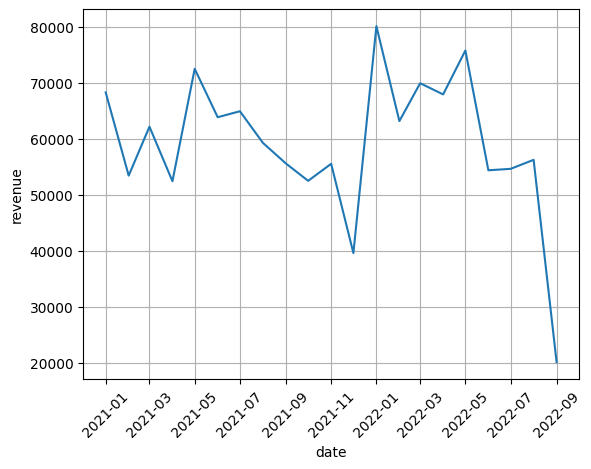

In [120]:
condition = (marketing_data_df['tpw_channels'] == 'Brand')&(marketing_data_df['country'] == 'UK')
label = "revenue"
"""
mu = marketing_data_df[condition]['impressions'].mean()
Q1 = marketing_data_df[condition]['impressions'].quantile(0.25)
Q3 = marketing_data_df[condition]['impressions'].quantile(0.75)
#print(Q3, Q1, Q3 - Q1, mu)
"""

#sns.histplot(marketing_data_df[(marketing_data_df['country'] == 'IT')&(marketing_data_df['tpw_channels'] == 'Brand')]['impressions'],bins=50)
ax = sns.lineplot(marketing_data_df[condition],
             x= marketing_data_df[condition]['date'],
             y= marketing_data_df[condition][label],
             ci=False)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.grid()
plt.show()

#### A:R Efficiency

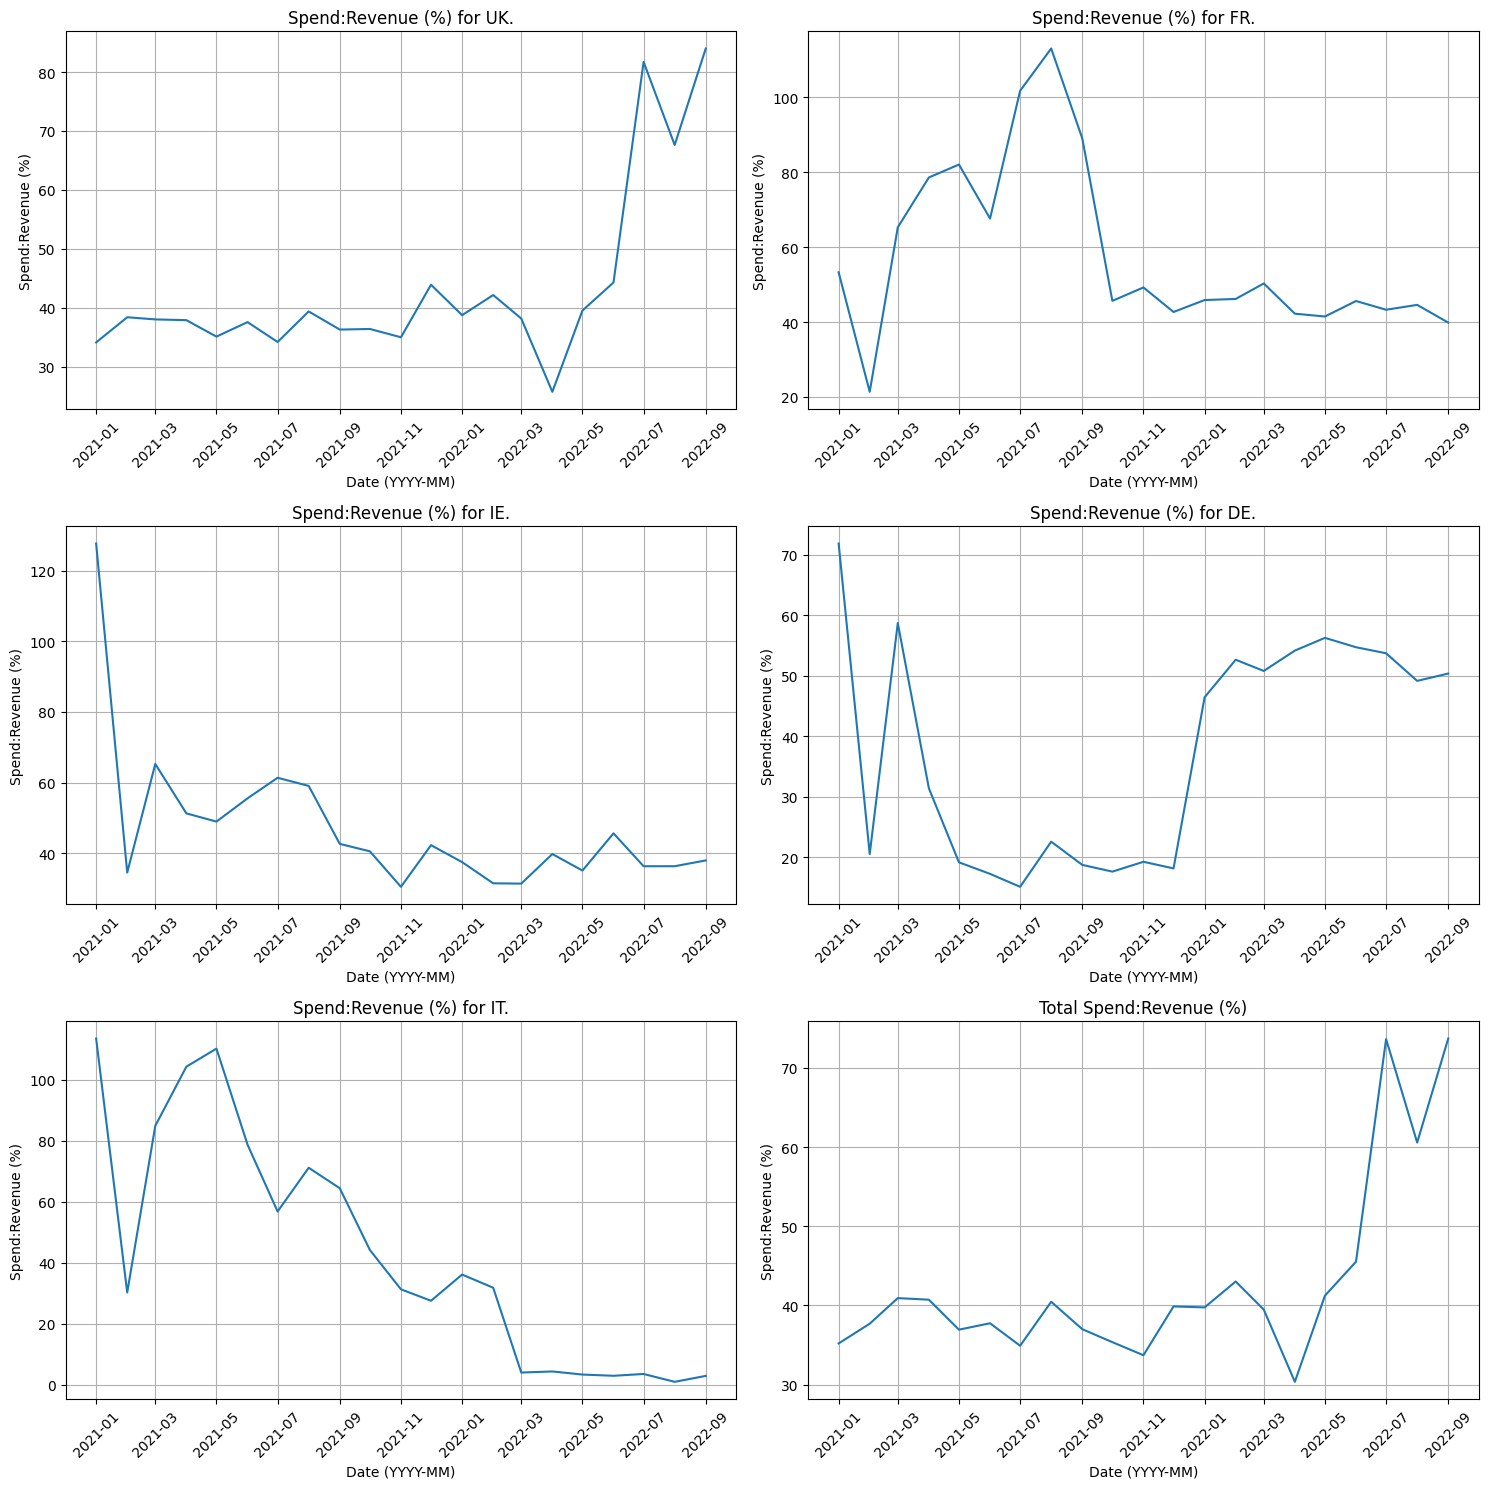

In [176]:
sr_df = marketing_data_df[['date','country','spend','revenue']].sort_values(by='date',ascending=True)
sr_df = sr_df.groupby(['date','country'])[['spend','revenue']].sum().reset_index()
sr_total_df = sr_df.groupby('date')[['spend','revenue']].sum().reset_index()

sr_df['spend_revenue_ratio'] = sr_df['spend']*100/sr_df['revenue']
sr_total_df['spend_revenue_ratio'] = sr_total_df['spend']*100/sr_total_df['revenue']

def plot_subplots(dataset,total_dataset,metric,label):
    maximum_value = max(max(dataset[label]),max(total_dataset[label]))
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))

    for axis_country in [[0,0,'UK'],[0,1,'FR'],[1,0,'IE'],[1,1,'DE'],[2,0,'IT']]:
        sns.lineplot(data=dataset[dataset['country'] == axis_country[2]],
                        x='date',
                        y=label,
                        errorbar=None,
                        ax = axes[axis_country[0],axis_country[1]])
        axes[axis_country[0],axis_country[1]].set_xticklabels(axes[axis_country[0],axis_country[1]].get_xticklabels(),rotation=45)
        axes[axis_country[0],axis_country[1]].set_title(f'{metric} for {axis_country[2]}.')
        axes[axis_country[0],axis_country[1]].set_ylabel(f'{metric}')
        axes[axis_country[0],axis_country[1]].set_xlabel('Date (YYYY-MM)')
        axes[axis_country[0],axis_country[1]].grid(True)

    sns.lineplot(data=total_dataset,
                        x='date',
                        y=label,
                        errorbar=None,
                        ax = axes[2,1])
    axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=45)
    axes[2,1].set_title(f'Total {metric}')
    axes[2,1].set_ylabel(f'{metric}')
    axes[2,1].set_xlabel('Date (YYYY-MM)')
    axes[2,1].grid(True)

    plt.tight_layout()
    plt.show()
    return

plot_subplots(sr_df,sr_total_df,'Spend:Revenue (%)','spend_revenue_ratio')

In [52]:
for ctry in ['UK','IE','FR','DE','IT']:
    corr = np.corrcoef(sr_df[sr_df['country'] == ctry]['spend_revenue_ratio'],sr_total_df['spend_revenue_ratio'])[0,1]
    print(f'Correlation-Coefficient between {ctry} and the total is: {round(corr,3)}.')

Correlation-Coefficient between UK and the total is: 0.991.
Correlation-Coefficient between IE and the total is: -0.234.
Correlation-Coefficient between FR and the total is: -0.268.
Correlation-Coefficient between DE and the total is: 0.353.
Correlation-Coefficient between IT and the total is: -0.442.


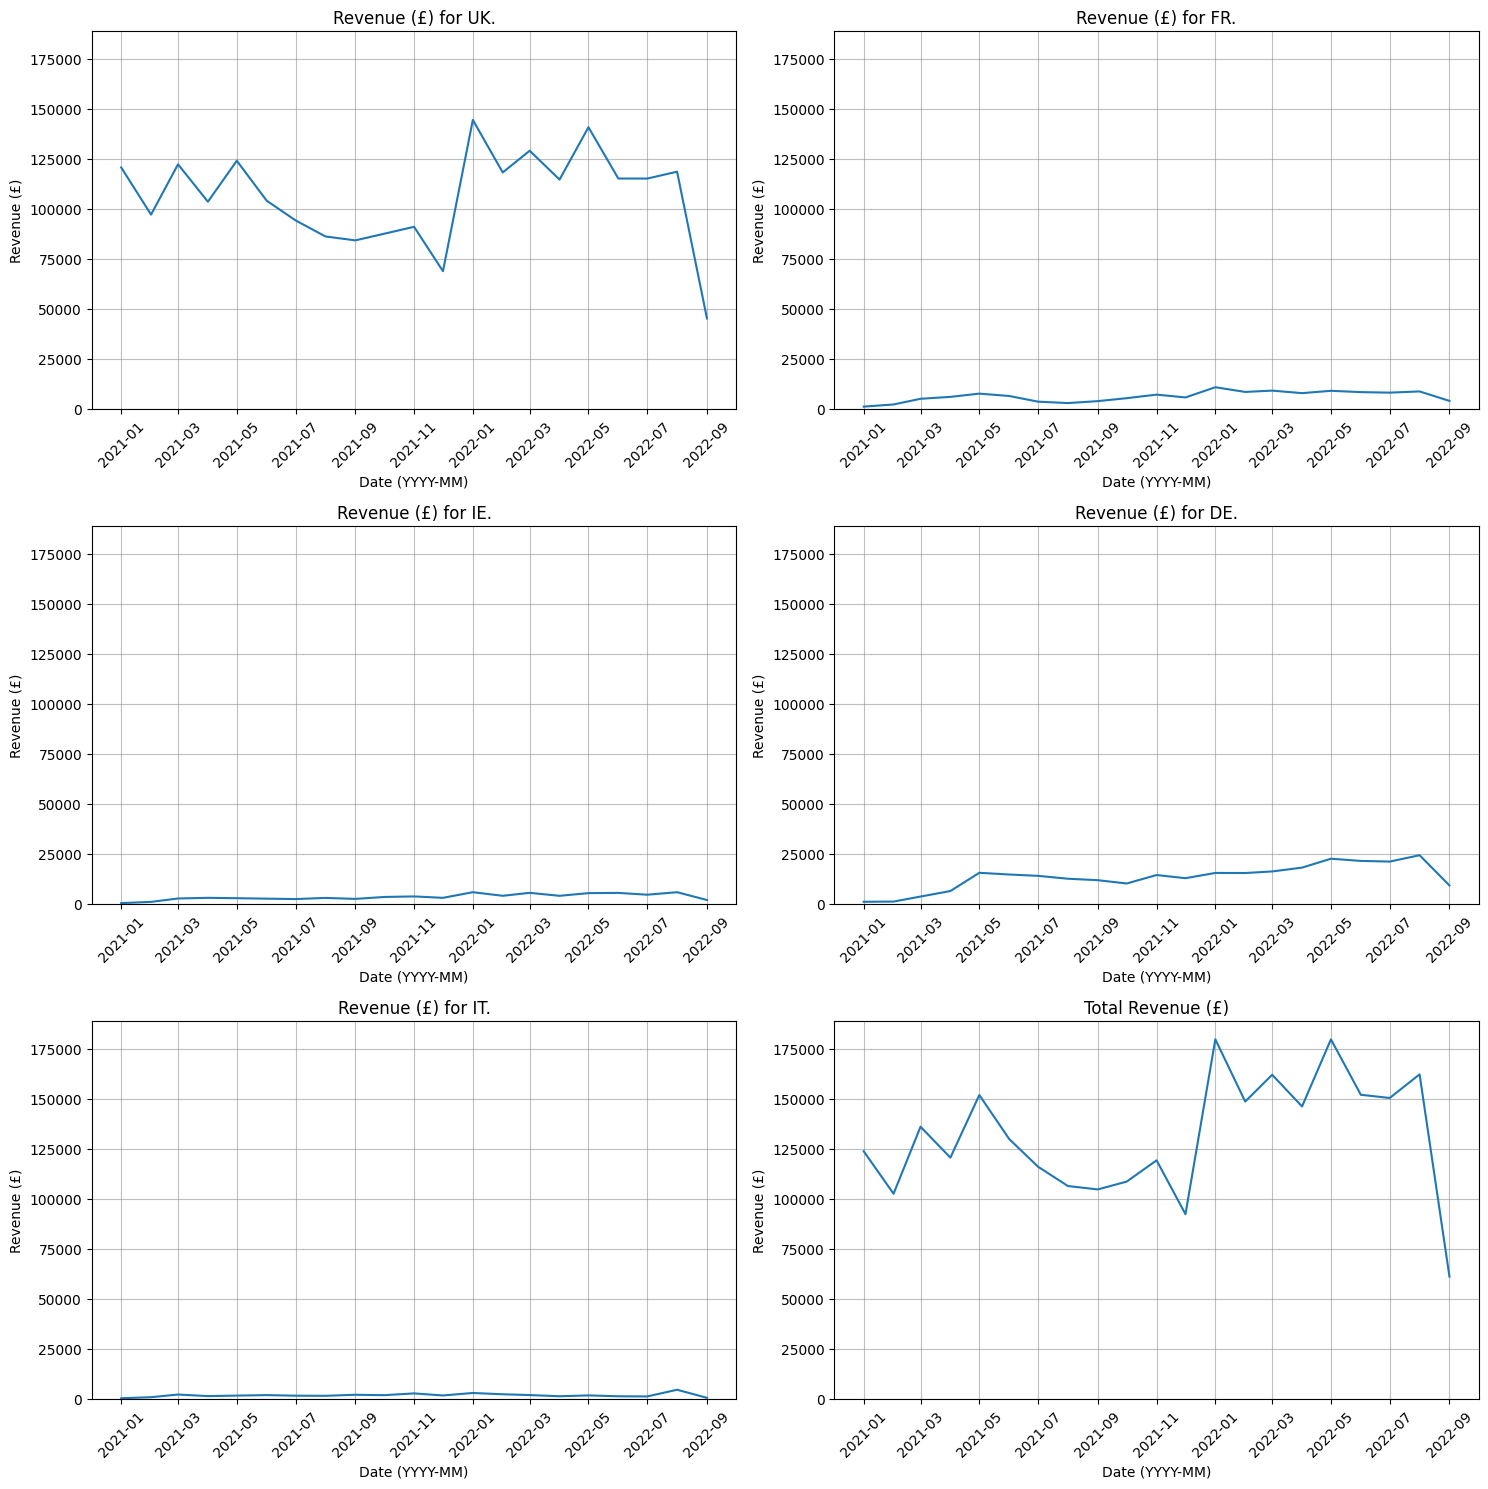

In [123]:
plot_subplots(sr_df,sr_total_df,'Revenue (£)','revenue')

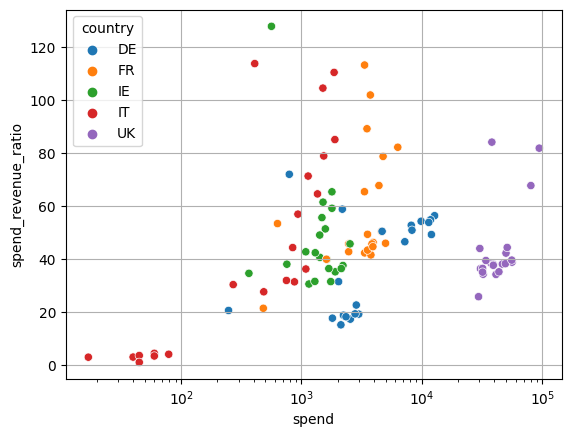

In [190]:
sns.scatterplot(x=sr_df['spend'],
                y=sr_df['spend_revenue_ratio'],
                hue=sr_df['country'])
plt.xscale('log')
plt.grid()
plt.show()

In [121]:
for ctry in ['UK','IE','FR','DE','IT']:
    corr = np.corrcoef(sr_df[sr_df['country'] == ctry]['spend_revenue_ratio'],sr_df[sr_df['country'] == ctry]['spend'])[0,1]
    print(f'Correlation-Coefficient between {ctry} spend:revenue ratio and {ctry} spend is: {round(corr,3)}.')

Correlation-Coefficient between UK spend:revenue ratio and UK spend is: 0.64.
Correlation-Coefficient between IE spend:revenue ratio and IE spend is: -0.272.
Correlation-Coefficient between FR spend:revenue ratio and FR spend is: 0.387.
Correlation-Coefficient between DE spend:revenue ratio and DE spend is: 0.589.
Correlation-Coefficient between IT spend:revenue ratio and IT spend is: 0.812.


#### France Engagement

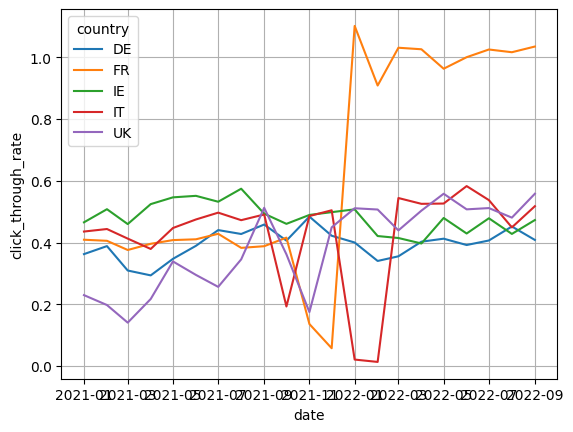

In [200]:
cond = marketing_data_df['tpw_channels']=='Brand'
sns.lineplot(x=marketing_data_df[cond]['date'],
             y=marketing_data_df[cond]['click_through_rate'],
             hue=marketing_data_df[cond]['country'],
             ci=False)
plt.grid()
plt.show()

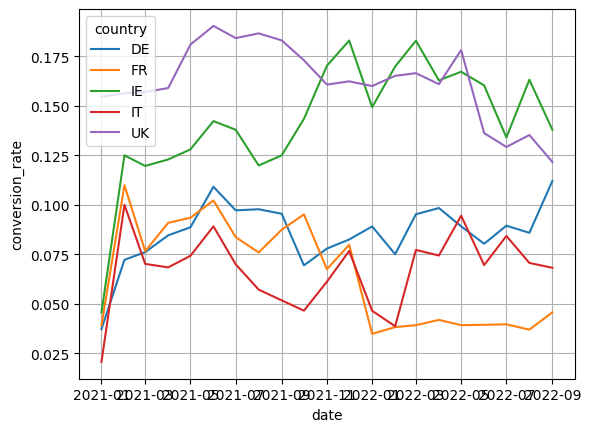

In [201]:
cond = marketing_data_df['tpw_channels']=='Brand'
sns.lineplot(x=marketing_data_df[cond]['date'],
             y=marketing_data_df[cond]['conversion_rate'],
             hue=marketing_data_df[cond]['country'],
             ci=False)
plt.grid()
plt.show()

#### Recent Trends (3-6 months)

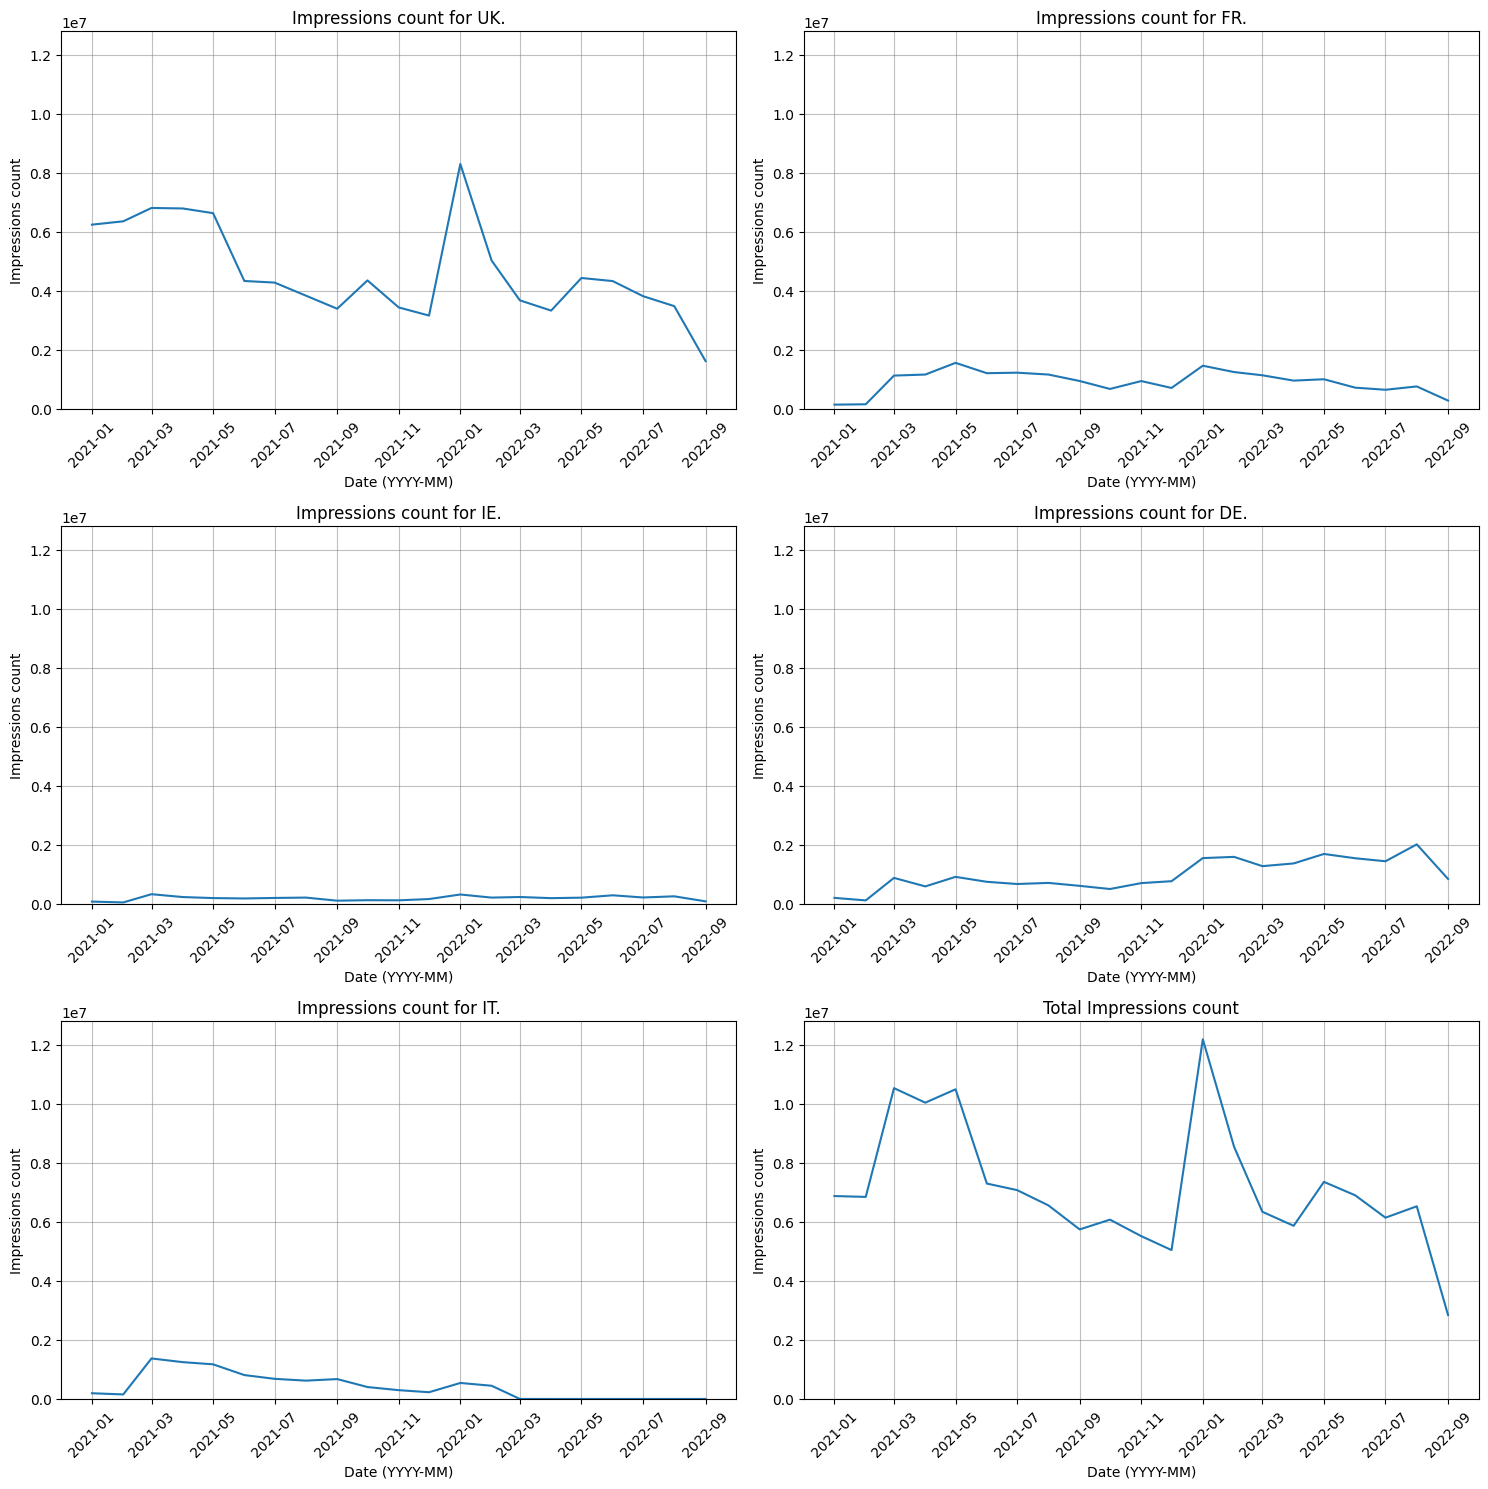

In [70]:
ad_engage_df = marketing_data_df[['date','country','impressions','clicks']].sort_values(by='date',ascending=True)
ad_engage_df = ad_engage_df.groupby(['date','country'])[['impressions','clicks']].sum().reset_index()
ad_engage_total_df = ad_engage_df.groupby('date')[['impressions','clicks']].sum().reset_index()

ad_engage_df['spend_revenue_ratio'] = ad_engage_df['spend']/sr_df['revenue']
sr_total_df['spend_revenue_ratio'] = sr_total_df['spend']*100/sr_total_df['revenue']

plot_subplots(ad_engage_df,ad_engage_total_df,'Impressions count','impressions')

#display(ad_engage_df.head(10))

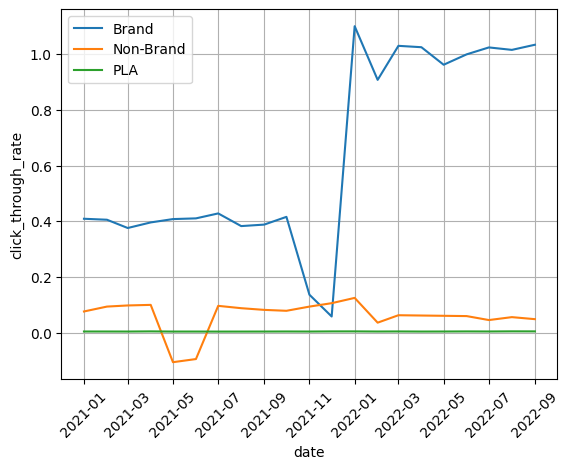

In [85]:
for channel in ['Brand','Non-Brand','PLA']:
    ax = sns.lineplot(data=monthly_dataset[(monthly_dataset['country'] == 'FR')&(monthly_dataset['tpw_channels'] == channel)],
                            x='date',
                            y='click_through_rate',
                            errorbar=None,
                            label = channel)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.grid()
plt.show()

In [97]:
df=marketing_data_df[['date','transactions']].sort_values(by='date',ascending=True)
combined_df = df.groupby('date')['transactions'].sum().reset_index()
display(combined_df)

,date,transactions
0,2021-01-01,3530
1,2021-02-01,3015
2,2021-03-01,3856
3,2021-04-01,3238
4,2021-05-01,4082
5,2021-06-01,3477
6,2021-07-01,2997
7,2021-08-01,2772
8,2021-09-01,2645
9,2021-10-01,2748


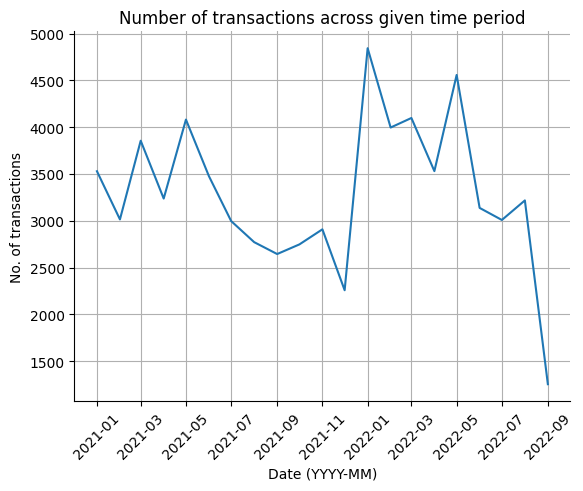

In [95]:
ax = sns.lineplot(data=combined_df,
                  x='date',
                  y='transactions',
                  errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Number of transactions across given time period')
ax.set_xlabel('Date (YYYY-MM)')
ax.set_ylabel('No. of transactions')
ax.spines[['right', 'top']].set_visible(False)
plt.grid()
plt.show()

### **Task 3** (Trading Data Visualisation)

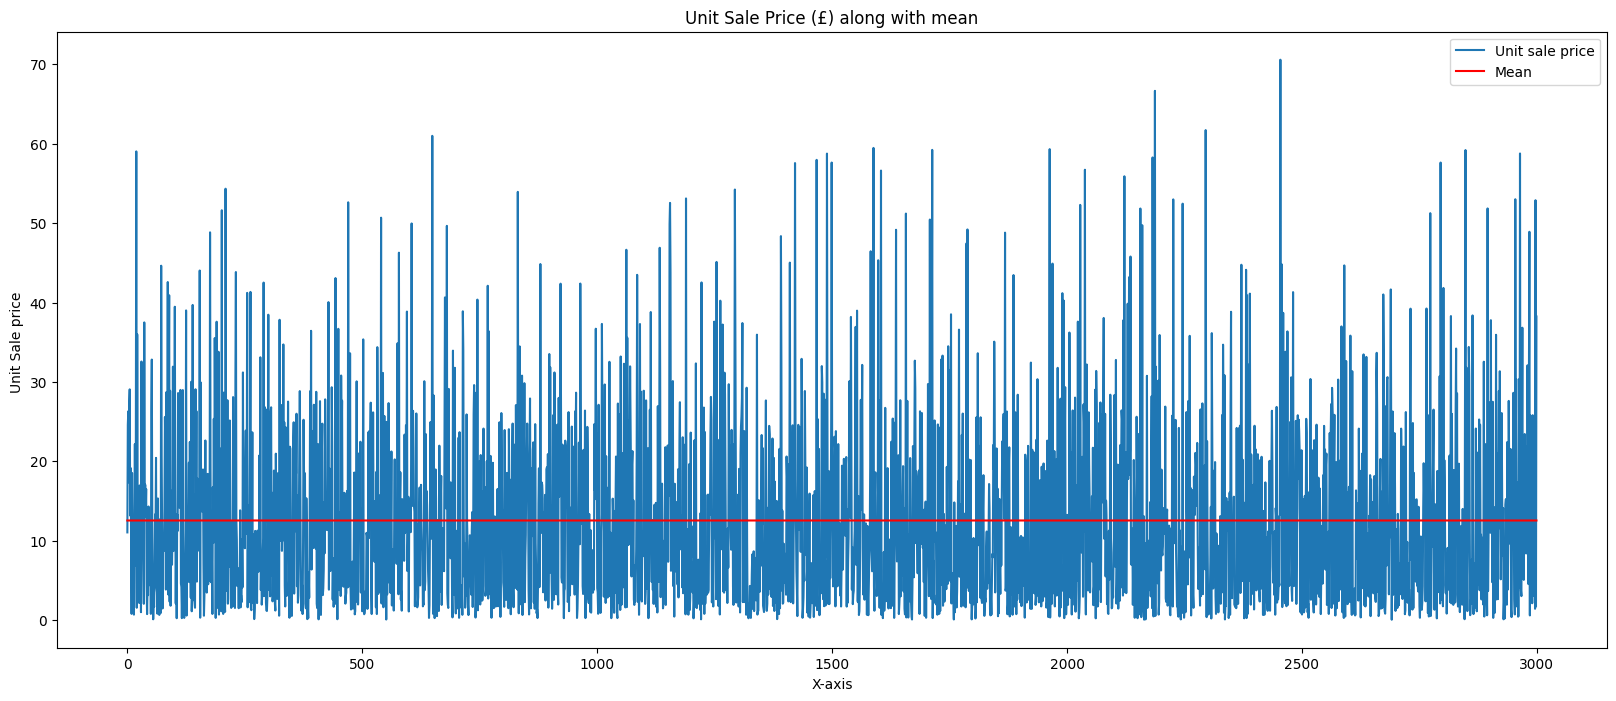

In [124]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=trading_data_df,x=trading_data_df.index,y=trading_data_df['unit_sale_price_gbp'],label='Unit sale price')
mean_plot = [trading_data_df['unit_sale_price_gbp'].mean()]*len(trading_data_df)
sns.lineplot(data=trading_data_df,x=trading_data_df.index,y=mean_plot,label='Mean',color='red')
plt.xlabel('X-axis')
plt.ylabel('Unit Sale price ') 
plt.title('Unit Sale Price (£) along with mean')
plt.legend()
plt.show()

In [125]:
display(marketing_data_df[marketing_data_df['transactions'] < marketing_data_df['new_customer_transactions']])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
38,2022-09-01,IE,PLA,572,86376,629,1186,31,55
44,2022-08-01,IE,PLA,1531,246912,1527,3075,88,163
73,2022-05-01,IE,PLA,1158,193603,1134,2020,55,93
75,2022-07-01,IE,PLA,1196,208778,1180,2304,59,103
77,2022-06-01,IE,PLA,1660,274070,1898,2171,66,120
236,2022-09-01,IE,Non-Brand,158,2623,160,206,5,10
253,2022-07-01,IE,Non-Brand,400,11169,511,488,12,23
259,2022-08-01,IE,Non-Brand,546,12266,624,558,15,28
269,2022-06-01,IE,Non-Brand,738,19265,973,889,22,43
275,2022-05-01,IE,Non-Brand,660,20103,1004,1003,24,38


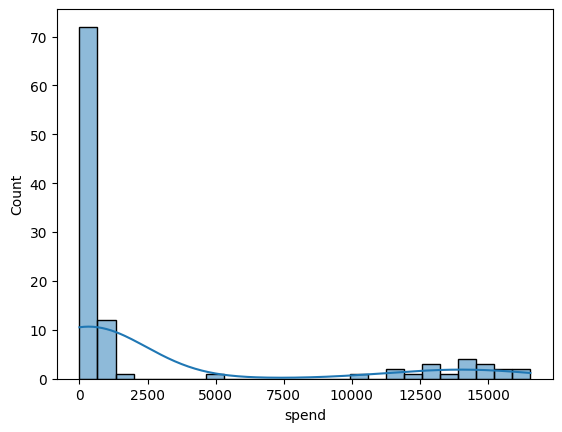

In [143]:
sns.histplot(marketing_data_df[marketing_data_df['tpw_channels'] == 'Non-Brand']['spend'], bins=25, kde=True)
plt.show() # NT combine date values

In [5]:
print(set(marketing_data_df['tpw_channels']))

{'PLA', 'Brand', 'Non-Brand'}
